In [1]:
NEURON_LAYER = 256
EPOCH = 200

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import statsmodels.graphics.tsaplots as sgt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv('../attributes_dataset/humidity.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.set_index('date', inplace=True)
df.columns = ['y']
df.head()

,y
date,
2018-01-01,87.5
2018-01-02,94.0
2018-01-03,94.0
2018-01-04,88.0
2018-01-05,89.0


# Convert Dataframe to Array

In [4]:
def df_to_array(df, window_size):
    df_y_np = df.y.to_numpy()
    df_index_np = df.index.to_numpy()
    
    x = []
    y = []
    date = []
    for i in range(len(df_index_np) - window_size):
        row = [[a] for a in df_y_np[i:i+window_size]]
        x.append(row)
        label = df_y_np[i+window_size]
        y.append(label)
        index = df_index_np[i+window_size]
        date.append(index)
        
    return np.array(x), np.array(y), np.array(date)

# Configure Batch Size

In [5]:
WINDOW_SIZE = 128

# Split the Data

In [6]:
train_ratio = int(len(df) * 0.8)
test_ratio = train_ratio + int(len(df) * 0.1)

dtrain, dval, dtest = df.iloc[:train_ratio], df.iloc[(train_ratio - WINDOW_SIZE):test_ratio], df.iloc[(test_ratio - WINDOW_SIZE):]

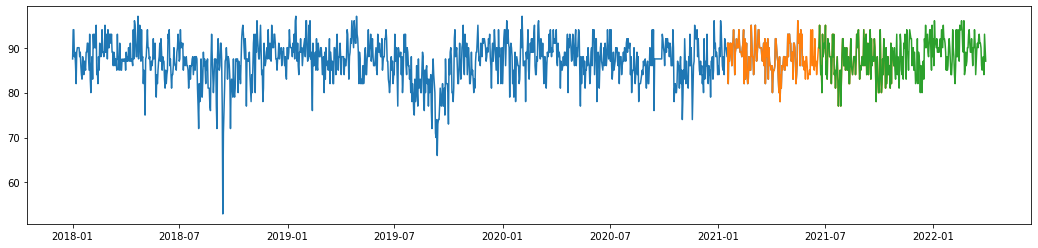

In [7]:
plt.figure(figsize=(18,4))
plt.plot(dtrain)
plt.plot(dval)
plt.plot(dtest)

# Standarization for data train

In [8]:
dev_val = dtrain.std()[0]
mean_val = dtrain.mean()[0]

def make_std(data):
    data_std = data    
    data_std = (data_std-mean_val)/dev_val
    
    return data_std

In [9]:
dtrain_std = make_std(dtrain)

In [10]:
dval_std = make_std(dval)

In [11]:
dtest_std = make_std(dtest)

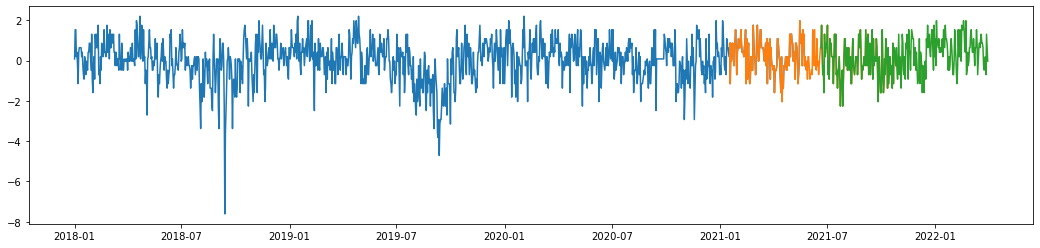

In [12]:
plt.figure(figsize=(18,4))
plt.plot(dtrain_std)
plt.plot(dval_std)
plt.plot(dtest_std)

# De-standarization Function

In [13]:
def de_std(df):
    column = ['Predictions', 'Actuals']
    for index, row in df.iterrows():
        for col in column:
            val = df.loc[index, col]
            df.loc[index, col] = (dev_val * val) + mean_val        

## Get x and y values

In [14]:
X_train, y_train, date_train = df_to_array(dtrain_std, WINDOW_SIZE)
X_val, y_val, date_val = df_to_array(dval_std, WINDOW_SIZE)
X_test, y_test, date_test = df_to_array(dtest_std, WINDOW_SIZE)

# Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE,1)))
model1.add(LSTM(NEURON_LAYER))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 266,257
Trainable params: 266,257
Non-trainable params: 0
_________________________________________________________________


### Saving the Model

In [17]:
cp = ModelCheckpoint('LSTM_models/model_cp/', save_best_only=True)

In [18]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [19]:
%%time
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCH, callbacks=[cp])

Epoch 1/200
35/35 [==============================] - ETA: 0s - loss: 0.9341 - root_mean_squared_error: 0.9665

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


35/35 [==============================] - 22s 584ms/step - loss: 0.9341 - root_mean_squared_error: 0.9665 - val_loss: 0.6969 - val_root_mean_squared_error: 0.8348
Epoch 2/200
35/35 [==============================] - ETA: 0s - loss: 0.8712 - root_mean_squared_error: 0.9334

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


35/35 [==============================] - 14s 418ms/step - loss: 0.8712 - root_mean_squared_error: 0.9334 - val_loss: 0.6961 - val_root_mean_squared_error: 0.8343
Epoch 3/200
35/35 [==============================] - 11s 303ms/step - loss: 0.8545 - root_mean_squared_error: 0.9244 - val_loss: 0.6972 - val_root_mean_squared_error: 0.8350
Epoch 4/200
35/35 [==============================] - 11s 304ms/step - loss: 0.8412 - root_mean_squared_error: 0.9172 - val_loss: 0.6969 - val_root_mean_squared_error: 0.8348
Epoch 5/200
35/35 [==============================] - 11s 303ms/step - loss: 0.8333 - root_mean_squared_error: 0.9129 - val_loss: 0.6988 - val_root_mean_squared_error: 0.8359
Epoch 6/200
35/35 [==============================] - ETA: 0s - loss: 0.8261 - root_mean_squared_error: 0.9089

INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


INFO:tensorflow:Assets written to: LSTM_models/model_cp\assets


35/35 [==============================] - 15s 434ms/step - loss: 0.8261 - root_mean_squared_error: 0.9089 - val_loss: 0.6901 - val_root_mean_squared_error: 0.8307
Epoch 7/200
35/35 [==============================] - 13s 377ms/step - loss: 0.8177 - root_mean_squared_error: 0.9043 - val_loss: 0.6956 - val_root_mean_squared_error: 0.8340
Epoch 8/200
35/35 [==============================] - 13s 374ms/step - loss: 0.8066 - root_mean_squared_error: 0.8981 - val_loss: 0.6973 - val_root_mean_squared_error: 0.8350
Epoch 9/200
35/35 [==============================] - 11s 324ms/step - loss: 0.7969 - root_mean_squared_error: 0.8927 - val_loss: 0.6986 - val_root_mean_squared_error: 0.8358
Epoch 10/200
35/35 [==============================] - 12s 338ms/step - loss: 0.7858 - root_mean_squared_error: 0.8865 - val_loss: 0.7038 - val_root_mean_squared_error: 0.8389
Epoch 11/200
35/35 [==============================] - 13s 375ms/step - loss: 0.7806 - root_mean_squared_error: 0.8835 - val_loss: 0.7028 - va

Epoch 53/200
35/35 [==============================] - 10s 298ms/step - loss: 0.7151 - root_mean_squared_error: 0.8456 - val_loss: 0.6996 - val_root_mean_squared_error: 0.8364
Epoch 54/200
35/35 [==============================] - 10s 298ms/step - loss: 0.7036 - root_mean_squared_error: 0.8388 - val_loss: 0.7064 - val_root_mean_squared_error: 0.8405
Epoch 55/200
35/35 [==============================] - 11s 301ms/step - loss: 0.7057 - root_mean_squared_error: 0.8400 - val_loss: 0.7084 - val_root_mean_squared_error: 0.8417
Epoch 56/200
35/35 [==============================] - 11s 307ms/step - loss: 0.7058 - root_mean_squared_error: 0.8401 - val_loss: 0.7084 - val_root_mean_squared_error: 0.8416
Epoch 57/200
35/35 [==============================] - 10s 300ms/step - loss: 0.7001 - root_mean_squared_error: 0.8367 - val_loss: 0.7098 - val_root_mean_squared_error: 0.8425
Epoch 58/200
35/35 [==============================] - 10s 298ms/step - loss: 0.7007 - root_mean_squared_error: 0.8371 - val_l

Epoch 100/200
35/35 [==============================] - 11s 302ms/step - loss: 0.6428 - root_mean_squared_error: 0.8018 - val_loss: 0.7260 - val_root_mean_squared_error: 0.8520
Epoch 101/200
35/35 [==============================] - 11s 314ms/step - loss: 0.6419 - root_mean_squared_error: 0.8012 - val_loss: 0.7306 - val_root_mean_squared_error: 0.8548
Epoch 102/200
35/35 [==============================] - 10s 299ms/step - loss: 0.6497 - root_mean_squared_error: 0.8060 - val_loss: 0.7183 - val_root_mean_squared_error: 0.8475
Epoch 103/200
35/35 [==============================] - 10s 296ms/step - loss: 0.6465 - root_mean_squared_error: 0.8041 - val_loss: 0.7267 - val_root_mean_squared_error: 0.8525
Epoch 104/200
35/35 [==============================] - 10s 294ms/step - loss: 0.6402 - root_mean_squared_error: 0.8001 - val_loss: 0.7345 - val_root_mean_squared_error: 0.8570
Epoch 105/200
35/35 [==============================] - 10s 291ms/step - loss: 0.6447 - root_mean_squared_error: 0.8029 -

35/35 [==============================] - 10s 295ms/step - loss: 0.5571 - root_mean_squared_error: 0.7464 - val_loss: 0.7823 - val_root_mean_squared_error: 0.8845
Epoch 193/200
35/35 [==============================] - 10s 298ms/step - loss: 0.5919 - root_mean_squared_error: 0.7693 - val_loss: 0.8174 - val_root_mean_squared_error: 0.9041
Epoch 194/200
35/35 [==============================] - 11s 304ms/step - loss: 0.5507 - root_mean_squared_error: 0.7421 - val_loss: 0.8854 - val_root_mean_squared_error: 0.9410
Epoch 195/200
35/35 [==============================] - 10s 299ms/step - loss: 0.5542 - root_mean_squared_error: 0.7444 - val_loss: 0.8245 - val_root_mean_squared_error: 0.9080
Epoch 196/200
35/35 [==============================] - 10s 297ms/step - loss: 0.5428 - root_mean_squared_error: 0.7367 - val_loss: 0.8843 - val_root_mean_squared_error: 0.9404
Epoch 197/200
35/35 [==============================] - 10s 296ms/step - loss: 0.5527 - root_mean_squared_error: 0.7434 - val_loss: 0.8

# Load the Model

## Train Results

In [20]:
train_prediction = model1.predict(X_train).flatten()
train_result = pd.DataFrame(data={'date': date_train,'Predictions': train_prediction, 'Actuals': y_train})
train_result.Predictions = round(train_result.Predictions, 2)
train_result.set_index('date', inplace=True)

In [21]:
de_std(train_result)

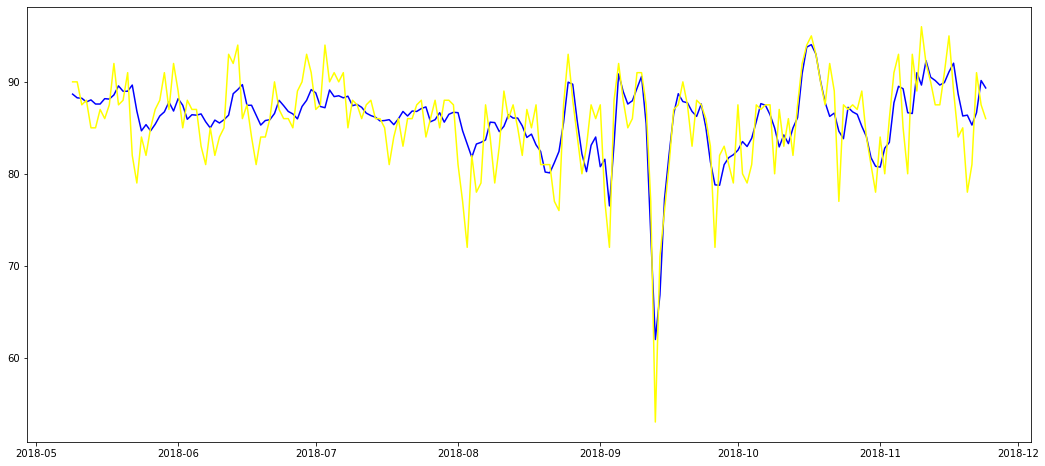

In [22]:
plt.figure(figsize=(18,8))
plt.plot(train_result['Predictions'][:200], color='blue')
plt.plot(train_result['Actuals'][:200], color='yellow')
plt.show()

In [23]:
train_MAE = mean_absolute_error(train_result['Actuals'], train_result['Predictions'])
train_RMSE = sqrt(mean_squared_error(train_result['Actuals'], train_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {train_MAE}')
print(f'Root Mean Squared Error is\t: {train_RMSE}')

Mean Absolute Error is		: 2.515855761740705
Root Mean Squared Error is	: 3.241527384503226


## Validation Results

In [24]:
val_prediction = model1.predict(X_val).flatten()
val_result = pd.DataFrame(data={'date': date_val, 'Predictions': val_prediction, 'Actuals': y_val})
val_result.set_index('date', inplace=True)
# val_result.Predictions = round(train_result.Predictions, 2)

In [25]:
de_std(val_result)

In [26]:
val_result

,Predictions,Actuals
date,,
2021-05-25,88.518013,88.0
2021-05-26,88.663673,86.0
2021-05-27,88.380318,85.0
2021-05-28,88.028191,87.0
2021-05-29,88.243530,83.0
...,...,...
2021-10-22,89.210472,82.0
2021-10-23,88.052963,90.0
2021-10-24,89.469414,89.0


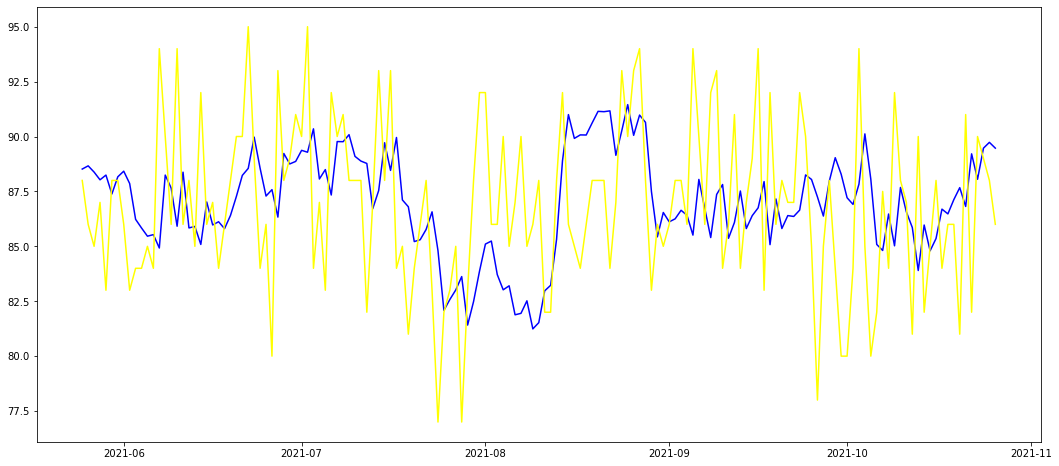

In [27]:
plt.figure(figsize=(18,8))
plt.plot(val_result['Predictions'], color='blue')
plt.plot(val_result['Actuals'], color='yellow')
plt.show()

In [28]:
val_MAE = mean_absolute_error(val_result['Actuals'], val_result['Predictions'])
val_RMSE = sqrt(mean_squared_error(val_result['Actuals'], val_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {val_MAE}')
print(f'Root Mean Squared Error is\t: {val_RMSE}')

Mean Absolute Error is		: 3.2866416685042843
Root Mean Squared Error is	: 4.1072893872826


## Test Results

In [29]:
test_prediction = model1.predict(X_test).flatten()
test_result = pd.DataFrame(data={'date': date_test, 'Predictions': test_prediction, 'Actuals': y_test})
test_result.set_index('date', inplace=True)
# test_result.Predictions = round(train_result.Predictions, 2)

In [30]:
de_std(test_result)

In [31]:
test_result

,Predictions,Actuals
date,,
2021-10-27,88.786232,90.0
2021-10-28,89.441673,85.0
2021-10-29,88.407860,83.0
2021-10-30,87.615288,88.0
2021-10-31,88.454582,93.0
...,...,...
2022-03-27,88.042038,88.0
2022-03-28,88.519051,84.0
2022-03-29,87.703987,93.0


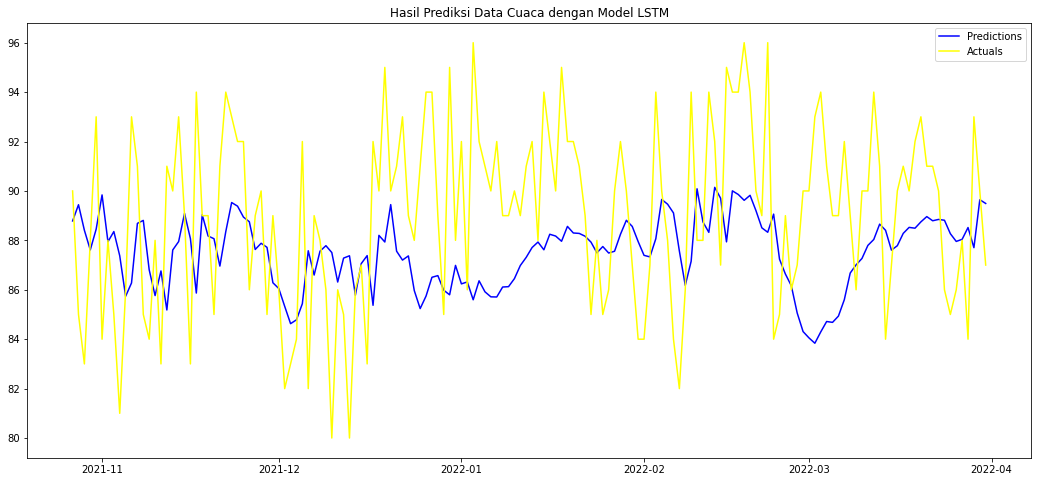

In [32]:
plt.figure(figsize=(18,8))
plt.title("Hasil Prediksi Data Cuaca dengan Model LSTM")
plt.plot(test_result['Predictions'], color='blue')
plt.plot(test_result['Actuals'], color='yellow')
plt.legend(['Predictions', 'Actuals'])
plt.show()
# plt.savefig('max_temp_LSTM.png')

In [33]:
test_MAE = mean_absolute_error(test_result['Actuals'], test_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(test_result['Actuals'], test_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Mean Absolute Error is		: 3.4160060393504605
Root Mean Squared Error is	: 4.15370040084217


# LSTM forecast

In [34]:
def one_step_forecast(model, X):
    X_val = np.array(X)
    result = model.predict(X_val).flatten()
    X_val_update = []
    
    for lags in X_val:
        lags_update = []
        
        for value in lags:
            lags_update.append(value)
        
        lags_update.append(result)
        lags_update = lags_update[1:]
        
        X_val_update.append(lags_update)
    
    
    return result, np.array(X_val_update)

In [35]:
def LSTM_forecast(model, period, lags):
    lags = [lags]
    final_result = []
    iteration = 0
    while iteration < period:
        result, lags = one_step_forecast(model, lags)
        final_result.append(result[0])
        iteration += 1
    return np.array(final_result), lags

In [36]:
X_start_test = X_test[0]

In [37]:
result, X_next = LSTM_forecast(model1, period=len(X_test), lags=X_start_test)

In [38]:
test_forecast_prediction = result
test_forecast_result = pd.DataFrame(data={'date': date_test, 'Predictions': test_forecast_prediction, 'Actuals': y_test})
test_forecast_result.set_index('date', inplace=True)

In [39]:
de_std(test_forecast_result)

In [40]:
test_forecast_result

,Predictions,Actuals
date,,
2021-10-27,88.786232,90.0
2021-10-28,89.164772,85.0
2021-10-29,89.269600,83.0
2021-10-30,89.224602,88.0
2021-10-31,89.104004,93.0
...,...,...
2022-03-27,89.109383,88.0
2022-03-28,89.346313,84.0
2022-03-29,89.447166,93.0


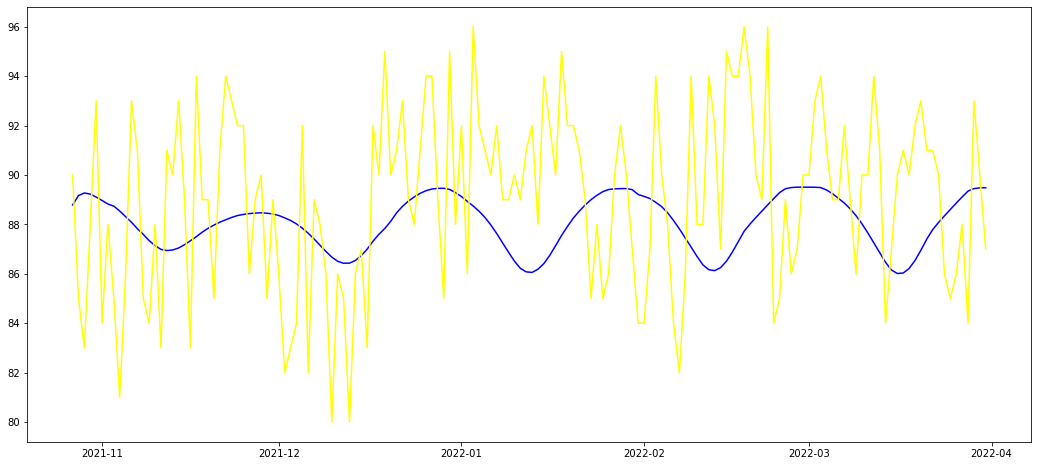

In [41]:
plt.figure(figsize=(18,8))
plt.plot(test_forecast_result['Predictions'], color='blue')
plt.plot(test_forecast_result['Actuals'], color='yellow')
plt.show()

In [42]:
test_MAE = mean_absolute_error(test_forecast_result['Actuals'], test_forecast_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(test_forecast_result['Actuals'], test_forecast_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Mean Absolute Error is		: 3.339438267243214
Root Mean Squared Error is	: 3.9435889036414635


# Plot Final Result

In [43]:
get_update_res = test_result.copy()
get_update_res.columns = ['Predictions_update', 'Actuals']
final_result = pd.concat([get_update_res, test_forecast_result[['Predictions']]], axis='columns')

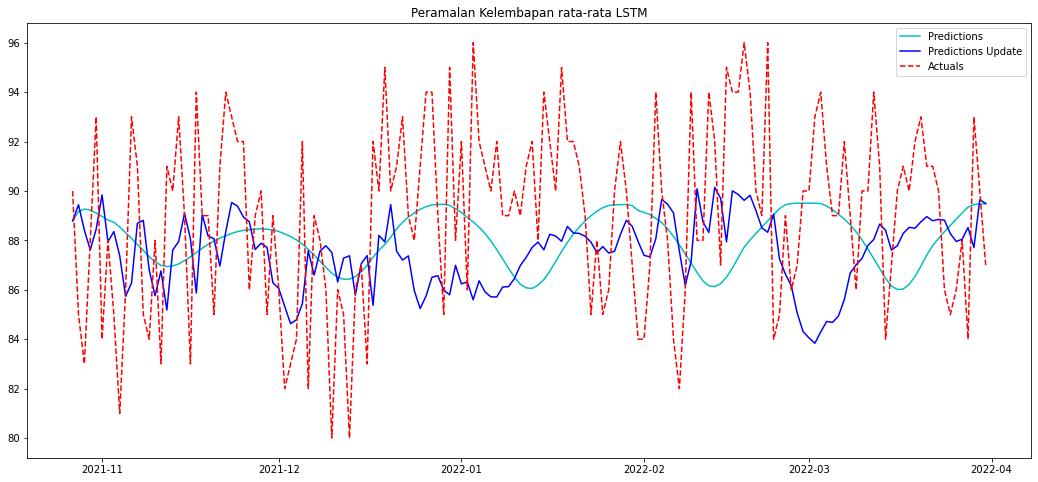

In [44]:
plt.figure(figsize=(18,8))
plt.title('Peramalan Kelembapan rata-rata LSTM')
plt.plot(final_result['Predictions'], 'c-',  label='Predictions')
plt.plot(final_result['Predictions_update'], 'b-',  label='Predictions Update')
plt.plot(final_result['Actuals'], color='red', linestyle='--' , label='Actuals')
plt.legend()

In [45]:
print("Predictions Error's")

test_MAE = mean_absolute_error(final_result['Actuals'], final_result['Predictions'])
test_RMSE = sqrt(mean_squared_error(final_result['Actuals'], final_result['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions Error's
Mean Absolute Error is		: 3.339438267243214
Root Mean Squared Error is	: 3.9435889036414635


In [46]:
print("Predictions with update Error's")

test_MAE = mean_absolute_error(final_result['Actuals'], final_result['Predictions_update'])
test_RMSE = sqrt(mean_squared_error(final_result['Actuals'], final_result['Predictions_update']))
print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions with update Error's
Mean Absolute Error is		: 3.4160060393504605
Root Mean Squared Error is	: 4.15370040084217


In [47]:
final_result.to_csv('LSTM_results_temp/hum_n'+str(NEURON_LAYER)+'_e'+str(EPOCH)+'.csv')

# Best Result

In [2]:
df_best = pd.read_csv('LSTM_results_temp/hum_n256_e100.csv')
df_best.date = pd.to_datetime(df_best.date, format='%Y-%m-%d')
df_best.set_index('date', inplace=True)
df_best.head()

,Predictions_update,Actuals,Predictions
date,,,
2021-10-27,86.862680,90.0,86.86268
2021-10-28,88.208710,85.0,87.09893
2021-10-29,86.710790,83.0,87.37631
2021-10-30,85.673386,88.0,87.63295
2021-10-31,87.679650,93.0,87.84488


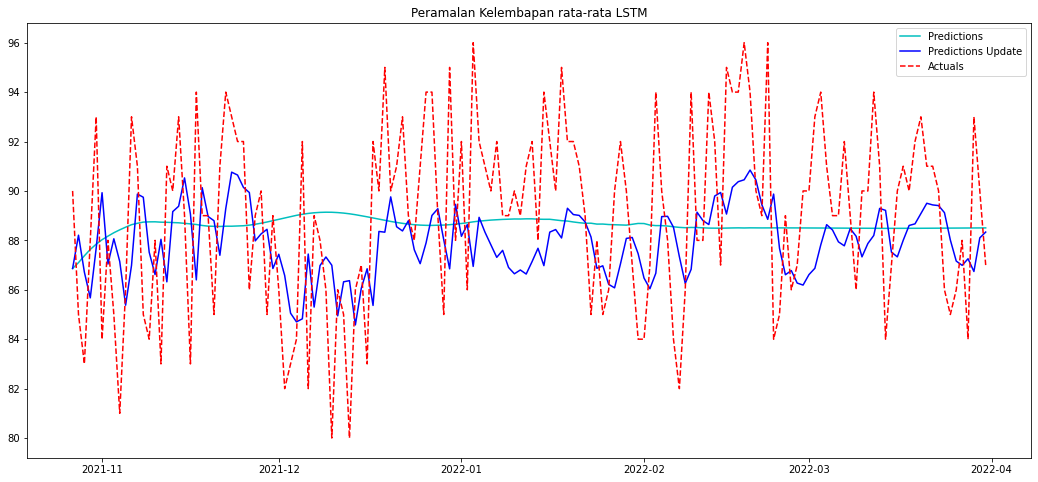

In [3]:
plt.figure(figsize=(18,8))
plt.title('Peramalan Kelembapan rata-rata LSTM')
plt.plot(df_best['Predictions'], 'c-',  label='Predictions')
plt.plot(df_best['Predictions_update'], 'b-',  label='Predictions Update')
plt.plot(df_best['Actuals'], color='red', linestyle='--' , label='Actuals')
plt.legend()

In [4]:
print("Predictions Error's")

test_MAE = mean_absolute_error(df_best['Actuals'], df_best['Predictions'])
test_RMSE = sqrt(mean_squared_error(df_best['Actuals'], df_best['Predictions']))

print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions Error's
Mean Absolute Error is		: 3.055179474358974
Root Mean Squared Error is	: 3.6843394528405806


In [5]:
print("Predictions with update Error's")

test_MAE = mean_absolute_error(df_best['Actuals'], df_best['Predictions_update'])
test_RMSE = sqrt(mean_squared_error(df_best['Actuals'], df_best['Predictions_update']))
print(f'Mean Absolute Error is\t\t: {test_MAE}')
print(f'Root Mean Squared Error is\t: {test_RMSE}')

Predictions with update Error's
Mean Absolute Error is		: 3.0768510576923074
Root Mean Squared Error is	: 3.714123243380338
